In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
element_df = pd.read_csv('air_lichen_query_full.csv', engine='python', on_bad_lines='skip')
pd.set_option('display.max_columns', None)
element_df.head(20)

,Name,Code for scientific name and authority in lookup table,Plot number,National Forest or other area,Latitude (decimal degrees),Longitude (decimal degrees),Wilderness Area,Region,Year of tissue collection,Chromium (ppm dw),Copper (ppm dw),Managanese (ppm dw),Nitrogen (% dw),Phosphorous (ppm dw),Potassium (ppm dw),Sulfur (% dw),Elevation (ft),Air pollution score,Taxonomic authority,Common name,AQ Rating
0,Alectoria sarmentosa,alesar,1200192,Okanogan-Wenatchee National Forest,46.77,-121.310,William O. Douglas Wilderness,6.0,2011.0,0.17,1.050,266.060,0.565,480.41,1360.20,0.034,5400.0,-0.889,(Ach.) Ach.,Goat's beard lichen,sensitive
1,NaN,blank,NaN,NaN,NaN,NaN,NaN,6.0,2011.0,NaN,NaN,NaN,0.000,NaN,NaN,0.004,NaN,NaN,NaN,NaN,NaN
2,Sphaerophorus globosus,sphglo,1090040,Siuslaw National Forest,44.07,-123.980,NaN,6.0,1995.0,0.5,5.900,25.400,0.380,491.00,1346.00,0.034,700.0,-0.015,(Hudson) Vainio,Coral lichen,intermediate
3,NaN,evepru,ARM156,Columbia River Gorge National Scenic Area,45.543,-122.248,NaN,6.0,2004.0,2.111,4.823,46.756,1.520,1010.60,3388.20,0.149,50.0,1.023,(L.) Ach.,Antler lichen,most tolerant
4,Platismatia glauca,plagla,1278176-N,Mt Baker-Snoqualmie National Forest,48.706,-121.582,Noisy-Diobsud Wilderness,6.0,2007.0,0.504,2.445,308.870,0.555,508.99,2261.60,0.049,NaN,-0.606,(L.) Culb. & C. Culb.,Rag lichen,most tolerant
5,Letharia vulpina,letvul,AnaPin03,Beaverhead-Deerlodge National Forest,45.862,-113.439,Anaconda Pintler Wilderness,14.0,2000.0,3,2.000,172.000,NaN,858.00,2970.00,0.043,6400.0,NaN,(L.) Hue,Wolf lichen,tolerant
6,NaN,flacap,Monong026B,Monongahela National Forest,39.019,-79.650,Otter Creek Wilderness,89.0,1992.0,NaN,6.592,116.554,1.400,1384.33,4204.78,0.132,2293.0,NaN,(L.) Hale,Yellow shield,NaN
7,Platismatia glauca,plagla,1122144,Mt. Hood National Forest,44.86,-122.200,Bull of the Woods Wilderness,6.0,2011.0,0.97,2.440,799.670,0.594,775.20,1579.30,0.041,4400.0,-0.435,(L.) Culb. & C. Culb.,Rag lichen,most tolerant
8,NaN,rice1006,NaN,NaN,NaN,NaN,NaN,6.0,2006.0,NaN,NaN,NaN,1.040,NaN,NaN,0.088,NaN,NaN,NaN,NaN,NaN
9,Alectoria sarmentosa,alesar,BobMar42,Flathead National Forest,47.936,-113.307,NaN,14.0,2003.0,2.25,2.540,37.700,NaN,231.00,800.00,0.031,NaN,NaN,(Ach.) Ach.,Goat's beard lichen,sensitive


In [5]:
element_df['Nitrogen (% dw)'].describe()

count    12553.000000
mean         0.913122
std          1.061515
min         -0.030000
25%          0.433000
50%          0.625000
75%          1.080000
max          9.650000
Name: Nitrogen (% dw), dtype: float64

In [6]:
element_df['Phosphorous (ppm dw)'].describe()

count    13155.000000
mean       867.938065
std        504.933509
min         -2.902000
25%        545.943500
50%        786.600000
75%       1090.000000
max       7500.000000
Name: Phosphorous (ppm dw), dtype: float64

In [7]:
element_df['Sulfur (% dw)'].describe()

count    15082.000000
mean         1.113543
std         73.165556
min         -0.006000
25%          0.046000
50%          0.068000
75%          0.110000
max       5960.000000
Name: Sulfur (% dw), dtype: float64

In [10]:
(element_df['Nitrogen (% dw)'] < 0).sum(), \
(element_df['Phosphorous (ppm dw)'] < 0).sum(), \
(element_df['Sulfur (% dw)'] < 0).sum()

(np.int64(78), np.int64(5), np.int64(23))

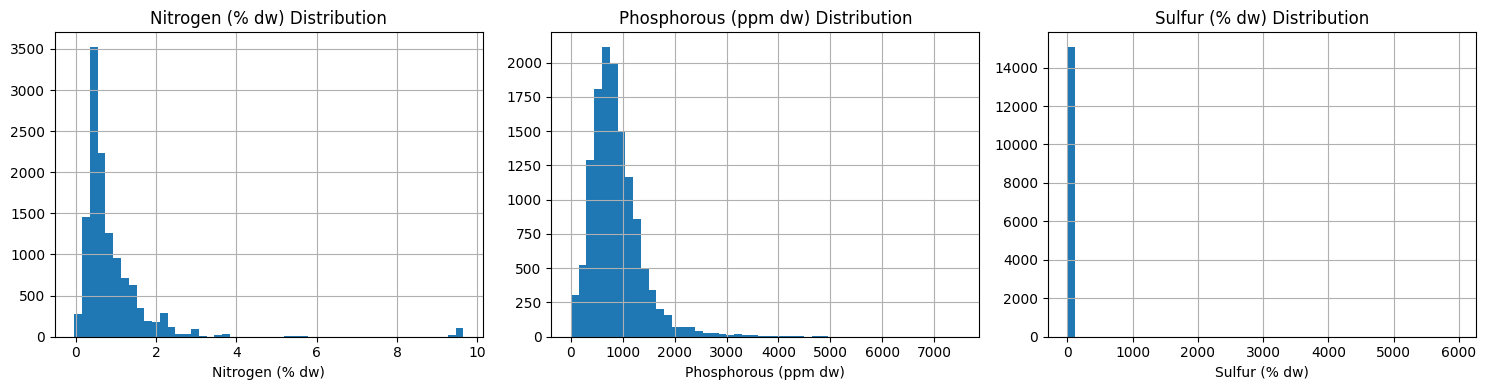

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

cols = ['Nitrogen (% dw)', 'Phosphorous (ppm dw)', 'Sulfur (% dw)']

for i, col in enumerate(cols):
    element_df[col].hist(bins=50, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

In [20]:
s_col = 'Sulfur (% dw)'

# Example: use the 99th percentile as an outlier cutoff
q99 = element_df[s_col].quantile(0.999)
q99


np.float64(0.6108380000000033)

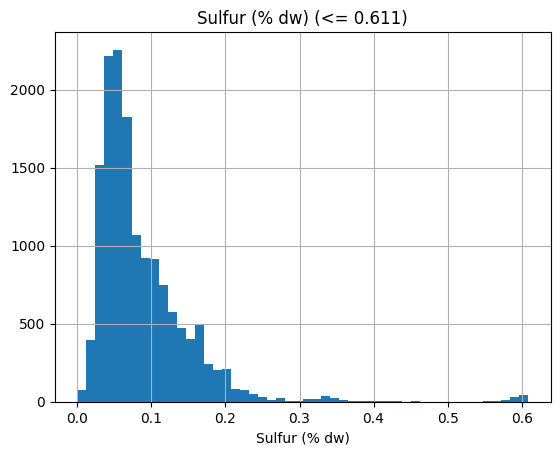

In [21]:
subset = element_df[(element_df[s_col] >= 0) & (element_df[s_col] <= q99)]

subset[s_col].hist(bins=50)
plt.title(f'{s_col} (<= {q99:.3f})')
plt.xlabel(s_col)
plt.show()


In [3]:
element_df['Aluminum (ppm dw)'].describe()

count    12238.000000
mean       556.026352
std        979.587372
min         -2.431000
25%        105.000000
50%        350.245000
75%        659.300000
max      22377.000000
Name: Aluminum (ppm dw), dtype: float64

In [4]:
element_df['Calcium (ppm dw)'].describe()

count     12680.000000
mean       5431.973496
std        9130.267742
min          -0.170000
25%        1643.095000
50%        2560.300000
75%        5108.250000
max      158000.000000
Name: Calcium (ppm dw), dtype: float64

In [5]:
element_df['Managanese (ppm dw)'].describe()

count    12688.000000
mean       168.145356
std        163.451088
min         -0.911000
25%         62.742000
50%        114.730000
75%        222.100000
max       4541.800000
Name: Managanese (ppm dw), dtype: float64

In [6]:
(element_df['Aluminum (ppm dw)'] < 0).sum()

np.int64(2)

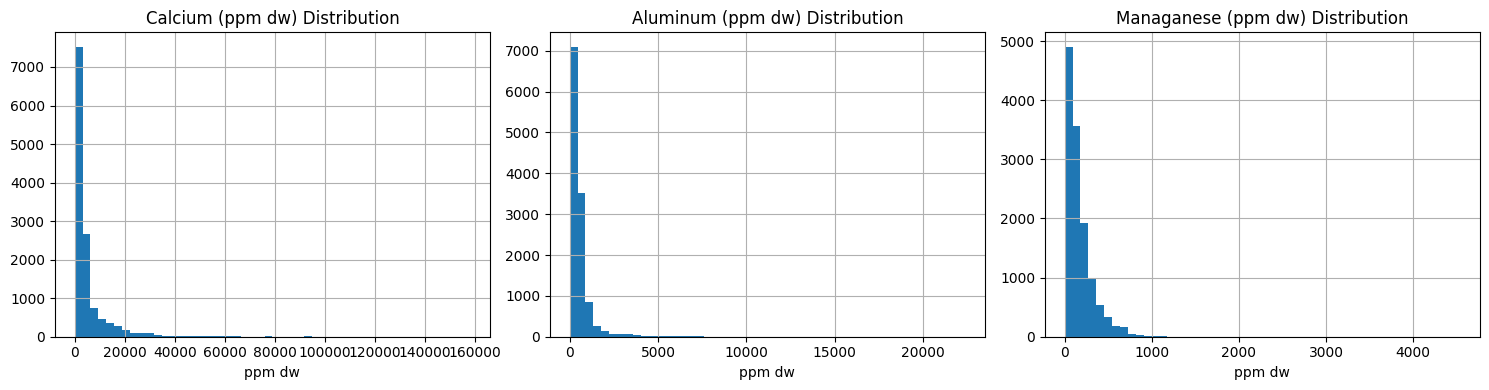

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(['Calcium (ppm dw)', 'Aluminum (ppm dw)', 'Managanese (ppm dw)']):
    element_df[col].hist(bins=50, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel('ppm dw')

plt.tight_layout()
plt.show()


Potassium (ppm dw)
count    13295.000000
mean      2883.910356
std       2667.915972
min        -27.752000
25%       1783.650000
50%       2363.000000
75%       3150.000000
max      61000.000000
Name: Potassium (ppm dw), dtype: float64


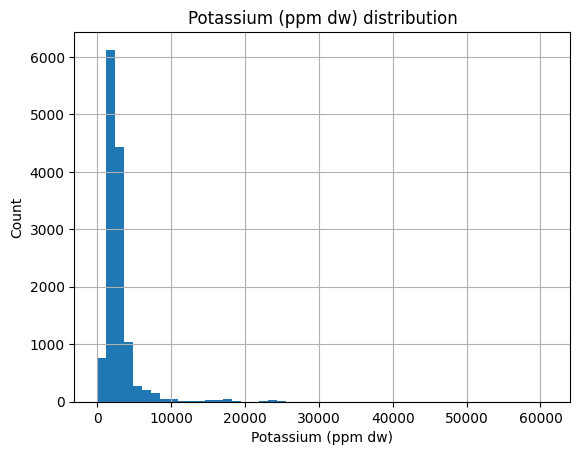


Elevation (ft)
count    13982.000000
mean      3232.123826
std       2177.916841
min          0.000000
25%       1403.500000
50%       3259.000000
75%       4700.000000
max      12600.000000
Name: Elevation (ft), dtype: float64


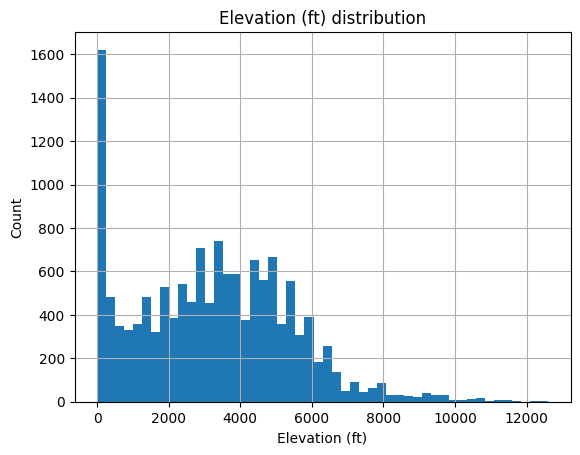


Air pollution score
count     9778.000000
mean         3.035595
std        187.407609
min         -2.349000
25%         -0.563000
50%         -0.339000
75%         -0.039000
max      10700.000000
Name: Air pollution score, dtype: float64


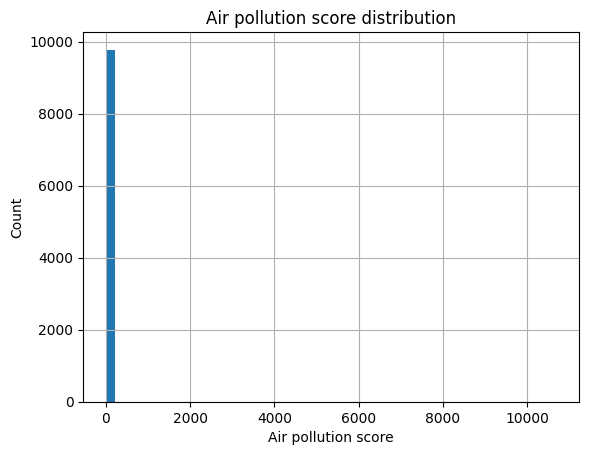

In [22]:
# Columns where you still want to understand the distribution
cols_to_explore = [
    'Potassium (ppm dw)',      # change to your actual K column name
    'Elevation (ft)',           # change if needed
    'Air pollution score'      # change if needed
]

for col in cols_to_explore:
    if col in element_df.columns:
        print('\n' + '='*30)
        print(col)
        print('='*30)
        print(element_df[col].describe())

        element_df[col].hist(bins=50)
        plt.title(f'{col} distribution')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()
    else:
        print(f'\n[Warning] Column "{col}" not found in element_df')


In [26]:
a_col = 'Air pollution score'

# Example: use the 99th percentile as an outlier cutoff
q99 = element_df[a_col].quantile(0.999)
q99


np.float64(2.831129000000041)

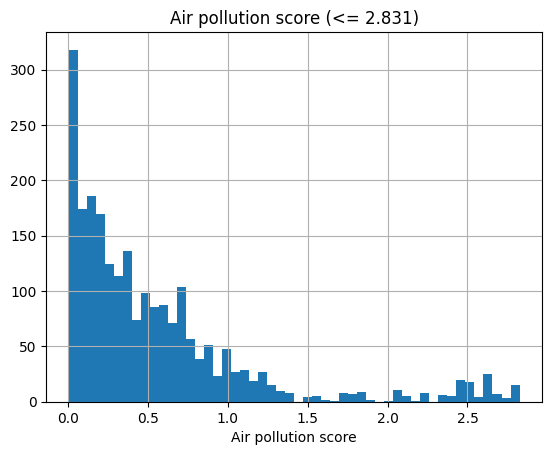

In [27]:
subset = element_df[(element_df[a_col] >= 0) & (element_df[a_col] <= q99)]

subset[a_col].hist(bins=50)
plt.title(f'{a_col} (<= {q99:.3f})')
plt.xlabel(a_col)
plt.show()


In [34]:
def discretize_lichen_dataset(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # ---------------------------
    # 0. Clip negatives to 0 for concentration columns
    # ---------------------------
    conc_cols = [
        'Nitrogen (% dw)',
        'Sulfur (% dw)',
        'Phosphorous (ppm dw)',
        'Copper (ppm dw)',
        'Chromium (ppm dw)',
        'Managanese (ppm dw)',      # keep dataset spelling
        'Potassium (ppm dw)'
    ]

    for col in conc_cols:
        if col in df.columns:
            print(f'{col}')
            print(f'Original dtype: {df[col].dtype}')
            df[col] = pd.to_numeric(df[col], errors='coerce')
            df.loc[df[col] < 0, col] = 0

    # ---------------------------
    # 1. Nitrogen (% dw)
    # 0–0.5, 0.5–1.0, 1.0–1.5, >1.5
    # ---------------------------
    if 'Nitrogen (% dw)' in df.columns:
        n_bins = [0, 0.5, 1.0, 1.5, np.inf]
        n_labels = [
            'Background N (0–0.5 %)',
            'Moderately elevated N (0.5–1.0 %)',
            'High N (1.0–1.5 %)',
            'Extreme N (>1.5 %)'
        ]
        df['Binned Nitrogen'] = pd.cut(
            df['Nitrogen (% dw)'],
            bins=n_bins,
            labels=n_labels,
            include_lowest=True
        )

    # ---------------------------
    # 2. Sulfur (% dw)
    # 0–0.04, 0.04–0.08, 0.08–0.12, >0.12
    # ---------------------------
    if 'Sulfur (% dw)' in df.columns:
        s_bins = [0, 0.04, 0.08, 0.12, np.inf]
        s_labels = [
            'Very low S (0–0.04 %)',
            'Low S (0.04–0.08 %)',
            'Moderate S (0.08–0.12 %)',
            'High S (>0.12 %)'
        ]
        df['Binned Sulfur'] = pd.cut(
            df['Sulfur (% dw)'],
            bins=s_bins,
            labels=s_labels,
            include_lowest=True
        )

    # ---------------------------
    # 3. Phosphorous (ppm dw)
    # 0–600, 600–1000, 1000–1600, >1600
    # ---------------------------
    if 'Phosphorous (ppm dw)' in df.columns:
        p_bins = [0, 600, 1000, 1600, np.inf]
        p_labels = [
            'Background P (0–600 ppm)',
            'Moderately elevated P (600–1000 ppm)',
            'High P (1000–1600 ppm)',
            'Extreme P (>1600 ppm)'
        ]
        df['Binned Phosphorous'] = pd.cut(
            df['Phosphorous (ppm dw)'],
            bins=p_bins,
            labels=p_labels,
            include_lowest=True
        )

    # ---------------------------
    # 4. Copper (ppm dw)
    # Low (0–15), Moderate (15–30), High (30–45), Extreme (45+)
    # ---------------------------
    if 'Copper (ppm dw)' in df.columns:
        cu_bins = [0, 15, 30, 45, np.inf]
        cu_labels = [
            'Low Cu (0–15 ppm)',
            'Moderate Cu (15–30 ppm)',
            'High Cu (30–45 ppm)',
            'Extreme Cu (>45 ppm)'
        ]
        df['Binned Copper'] = pd.cut(
            df['Copper (ppm dw)'],
            bins=cu_bins,
            labels=cu_labels,
            include_lowest=True
        )

    # ---------------------------
    # 5. Chromium (ppm dw)
    # Low (0–2.5), Moderate (2.5–5), High (5–7.5), Extreme (7.5+)
    # ---------------------------
    if 'Chromium (ppm dw)' in df.columns:
        cr_bins = [0, 2.5, 5, 7.5, np.inf]
        cr_labels = [
            'Low Cr (0–2.5 ppm)',
            'Moderate Cr (2.5–5 ppm)',
            'High Cr (5–7.5 ppm)',
            'Extreme Cr (>7.5 ppm)'
        ]
        df['Binned Chromium'] = pd.cut(
            df['Chromium (ppm dw)'],
            bins=cr_bins,
            labels=cr_labels,
            include_lowest=True
        )

    # ---------------------------
    # 6. Manganese (ppm dw)
    # Low (0–100), Moderate (100–150), High (150–250), Extreme (250+)
    # ---------------------------
    if 'Managanese (ppm dw)' in df.columns:
        mn_bins = [0, 100, 150, 250, np.inf]
        mn_labels = [
            'Low Mn (0–100 ppm)',
            'Moderate Mn (100–150 ppm)',
            'High Mn (150–250 ppm)',
            'Extreme Mn (>250 ppm)'
        ]
        df['Binned Manganese'] = pd.cut(
            df['Managanese (ppm dw)'],
            bins=mn_bins,
            labels=mn_labels,
            include_lowest=True
        )

    # ---------------------------
    # 7. Potassium (ppm dw)
    # Low: < mean - 0.25*std
    # Medium: between mean ± 0.25*std
    # High: > mean + 0.25*std
    # ---------------------------
    if 'Potassium (ppm dw)' in df.columns:
        k_mean = df['Potassium (ppm dw)'].mean()
        k_std = df['Potassium (ppm dw)'].std()
        k_low = k_mean - 0.25 * k_std
        k_high = k_mean + 0.25 * k_std

        def categorize_k(x):
            if pd.isna(x):
                return np.nan
            if x < k_low:
                return 'Low K'
            elif x > k_high:
                return 'High K'
            else:
                return 'Medium K'

        df['Binned Potassium'] = df['Potassium (ppm dw)'].apply(categorize_k)

        print(f'Potassium thresholds: Low < {k_low:.1f}, '
              f'Medium {k_low:.1f}–{k_high:.1f}, High > {k_high:.1f}')

    # ---------------------------
    # 8. Year of tissue collection
    # Before 1995, 1995–2005, 2005–Present
    # ---------------------------
    if 'Year of tissue collection' in df.columns:
        year_bins = [0, 1995, 2005, np.inf]
        year_labels = [
            'Before 1995',
            '1995–2005',
            '2005–Present'
        ]
        df['Binned Year'] = pd.cut(
            df['Year of tissue collection'],
            bins=year_bins,
            labels=year_labels,
            right=False,         # [start, end)
            include_lowest=True
        )

    # ---------------------------
    # 9. Region → grouped regions
    # ---------------------------
    if 'Region' in df.columns:
        region_map = {
            # West interior
            'Northern Region': 'Northern/Rocky/Intermountain/Southwestern',
            'Rocky Mountain Region': 'Northern/Rocky/Intermountain/Southwestern',
            'Southwestern Region': 'Northern/Rocky/Intermountain/Southwestern',
            'Intermountain Region (14)': 'Northern/Rocky/Intermountain/Southwestern',
            # Pacific
            'Pacific Southwest Region (5)': 'Pacific Southwest',
            'Pacific Northwest Region (6)': 'Pacific Northwest',
            # South & East
            'Southern Region': 'Southern/Eastern',
            'Eastern Region (89)': 'Southern/Eastern',
            # Alaska
            'Alaska Region (R10)': 'Alaska'
        }
        df['Region Group'] = df['Region'].map(region_map)

    # ---------------------------
    # 10. Elevation (ft) – quartile-based bins
    # ---------------------------
    if 'Elevation (ft)' in df.columns:
        elev = df['Elevation (ft)']
        q1, q2, q3 = elev.quantile([0.25, 0.5, 0.75])

        elev_bins = [elev.min() - 1, q1, q2, q3, elev.max() + 1]
        elev_labels = [
            'Low elevation',
            'Mid-low elevation',
            'Mid-high elevation',
            'High elevation'
        ]
        df['Binned Elevation'] = pd.cut(
            elev,
            bins=elev_bins,
            labels=elev_labels,
            include_lowest=True
        )

        print(f'Elevation quartiles: Q1={q1:.0f}, Q2={q2:.0f}, Q3={q3:.0f}')

    # ---------------------------
    # 11. Air pollution score
    # ecological bins + outside-range categories
    # ---------------------------
    if 'Air pollution score' in df.columns:
        ap_bins = [
            -np.inf,
            -1.4,
            -0.11,
            0.02,
            0.21,
            0.35,
            0.49,
            2.0,
            np.inf
        ]
        ap_labels = [
            'Below calibrated range (< -1.4)',
            'Best air quality (-1.4 to -0.11)',
            'Good air quality (-0.11 to 0.02)',
            'Fair air quality (0.02 to 0.21)',
            'Degraded air quality (0.21 to 0.35)',
            'Poor air quality (0.35 to 0.49)',
            'Worst air quality (0.49 to 2.0)',
            'Above calibrated range (> 2.0)'
        ]
        df['Binned Air pollution'] = pd.cut(
            df['Air pollution score'],
            bins=ap_bins,
            labels=ap_labels,
            include_lowest=True
        )

    return df


In [35]:
element_df_binned = discretize_lichen_dataset(element_df)

# Build a list of columns to inspect, keeping only those that actually exist
cols_to_show = [
    'sci_name',
    'Nitrogen (% dw)', 'Binned Nitrogen',
    'Sulfur (% dw)', 'Binned Sulfur',
    'Phosphorous (ppm dw)', 'Binned Phosphorous',
    'Copper (ppm dw)', 'Binned Copper',
    'Chromium (ppm dw)', 'Binned Chromium',
    'Managanese (ppm dw)', 'Binned Manganese',
    'Potassium (ppm dw)', 'Binned Potassium',
    'Year of tissue collection', 'Binned Year',
    'Region', 'Region Group',
    'Elevation (ft)', 'Binned Elevation',
    'Air pollution score', 'Binned Air pollution'
]

cols_to_show = [c for c in cols_to_show if c in element_df_binned.columns]

element_df_binned[cols_to_show].head(20)


Nitrogen (% dw)
Original dtype: float64
Sulfur (% dw)
Original dtype: float64
Phosphorous (ppm dw)
Original dtype: float64
Copper (ppm dw)
Original dtype: float64
Chromium (ppm dw)
Original dtype: object
Managanese (ppm dw)
Original dtype: float64
Potassium (ppm dw)
Original dtype: float64
Potassium thresholds: Low < 2216.9, Medium 2216.9–3550.9, High > 3550.9
Elevation quartiles: Q1=1404, Q2=3259, Q3=4700


,Nitrogen (% dw),Binned Nitrogen,Sulfur (% dw),Binned Sulfur,Phosphorous (ppm dw),Binned Phosphorous,Copper (ppm dw),Binned Copper,Chromium (ppm dw),Binned Chromium,Managanese (ppm dw),Binned Manganese,Potassium (ppm dw),Binned Potassium,Year of tissue collection,Binned Year,Region,Region Group,Elevation (ft),Binned Elevation,Air pollution score,Binned Air pollution
0,0.565,Moderately elevated N (0.5–1.0 %),0.034,Very low S (0–0.04 %),480.41,Background P (0–600 ppm),1.050,Low Cu (0–15 ppm),0.170,Low Cr (0–2.5 ppm),266.060,Extreme Mn (>250 ppm),1360.20,Low K,2011.0,2005–Present,6.0,NaN,5400.0,High elevation,-0.889,Best air quality (-1.4 to -0.11)
1,0.000,Background N (0–0.5 %),0.004,Very low S (0–0.04 %),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,2005–Present,6.0,NaN,NaN,NaN,NaN,NaN
2,0.380,Background N (0–0.5 %),0.034,Very low S (0–0.04 %),491.00,Background P (0–600 ppm),5.900,Low Cu (0–15 ppm),0.500,Low Cr (0–2.5 ppm),25.400,Low Mn (0–100 ppm),1346.00,Low K,1995.0,1995–2005,6.0,NaN,700.0,Low elevation,-0.015,Good air quality (-0.11 to 0.02)
3,1.520,Extreme N (>1.5 %),0.149,High S (>0.12 %),1010.60,High P (1000–1600 ppm),4.823,Low Cu (0–15 ppm),2.111,Low Cr (0–2.5 ppm),46.756,Low Mn (0–100 ppm),3388.20,Medium K,2004.0,1995–2005,6.0,NaN,50.0,Low elevation,1.023,Worst air quality (0.49 to 2.0)
4,0.555,Moderately elevated N (0.5–1.0 %),0.049,Low S (0.04–0.08 %),508.99,Background P (0–600 ppm),2.445,Low Cu (0–15 ppm),0.504,Low Cr (0–2.5 ppm),308.870,Extreme Mn (>250 ppm),2261.60,Medium K,2007.0,2005–Present,6.0,NaN,NaN,NaN,-0.606,Best air quality (-1.4 to -0.11)
5,NaN,NaN,0.043,Low S (0.04–0.08 %),858.00,Moderately elevated P (600–1000 ppm),2.000,Low Cu (0–15 ppm),3.000,Moderate Cr (2.5–5 ppm),172.000,High Mn (150–250 ppm),2970.00,Medium K,2000.0,1995–2005,14.0,NaN,6400.0,High elevation,NaN,NaN
6,1.400,High N (1.0–1.5 %),0.132,High S (>0.12 %),1384.33,High P (1000–1600 ppm),6.592,Low Cu (0–15 ppm),NaN,NaN,116.554,Moderate Mn (100–150 ppm),4204.78,High K,1992.0,Before 1995,89.0,NaN,2293.0,Mid-low elevation,NaN,NaN
7,0.594,Moderately elevated N (0.5–1.0 %),0.041,Low S (0.04–0.08 %),775.20,Moderately elevated P (600–1000 ppm),2.440,Low Cu (0–15 ppm),0.970,Low Cr (0–2.5 ppm),799.670,Extreme Mn (>250 ppm),1579.30,Low K,2011.0,2005–Present,6.0,NaN,4400.0,Mid-high elevation,-0.435,Best air quality (-1.4 to -0.11)
8,1.040,High N (1.0–1.5 %),0.088,Moderate S (0.08–0.12 %),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0,2005–Present,6.0,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,0.031,Very low S (0–0.04 %),231.00,Background P (0–600 ppm),2.540,Low Cu (0–15 ppm),2.250,Low Cr (0–2.5 ppm),37.700,Low Mn (0–100 ppm),800.00,Low K,2003.0,1995–2005,14.0,NaN,NaN,NaN,NaN,NaN


In [36]:
element_df_binned.to_csv("air_lichen_with_bins.csv", index=False)